## CustomSource



In [82]:
%reset -f 
%matplotlib inline

import numpy as np
import meep as mp 
import matplotlib.pyplot as plt


dx = 100
dy = 100
area = mp.Vector3(dx, dy, 0)

def pulse(t):
    return -np.exp(-(t-20)**2 / 2.0)
    #return np.sin(t) 
    #return np.sin(2*t)*np.exp(-(t-10)**2 / 30.0)

sources = [mp.Source(mp.CustomSource(src_func=pulse), 
                     component = mp.Ez,
                     center = mp.Vector3(0,0,0))]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                    geometry=[], sources=sources, resolution=4)

sim.run(until=40)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)
data = data.transpose()

-----------
Initializing structure...
run 0 finished at t = 40.0 (320 timesteps)


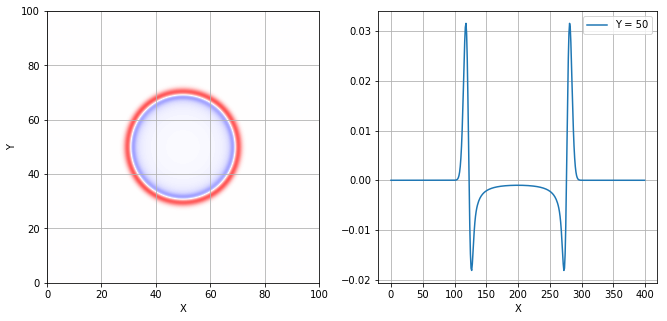

In [83]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
 
plt.imshow(data, interpolation='spline36', cmap='bwr', alpha=1.0, 
           extent=(0, dx, 0, dy), norm=plt.Normalize(-0.05, 0.05))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(data[200,:], label='Y = 50')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()